In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..")
os.getcwd()

'D:\\DoingDataScience\\mixed-anomaly'

In [2]:
from anomaly.isolation.isolation_forest import IsolationForest

In [3]:
import numpy as np
import pandas as pd
import string

def create_test_data(rows, numerical_columns, categorical_columns):
    data_np = np.random.rand(rows, numerical_columns)
    data = pd.DataFrame(data_np, columns=list(string.ascii_letters)[:numerical_columns])
    for categorical_index in range(categorical_columns):
        cardinality = np.random.randint(2, 8)
        categorical_values = list(string.ascii_letters)[:numerical_columns]
        values = np.random.choice(categorical_values, size=rows)
        data[list(string.ascii_letters)[categorical_index + numerical_columns]] = values
    return data

data = create_test_data(rows=1000, numerical_columns=4, categorical_columns=4)
test_data = create_test_data(rows=1000, numerical_columns=4, categorical_columns=4)
test_data.loc[:500, 'a'] = test_data.loc[:500, 'a'] - 0.5
test_data.loc[:500, 'b'] = test_data.loc[:500, 'b'] - 0.5
test_data.loc[:500, 'c'] = test_data.loc[:500, 'c'] - 0.5
test_data.loc[:500, 'd'] = test_data.loc[:500, 'd'] - 0.5
test_data.loc[:500, 'e'] = 'a'
test_data

,a,b,c,d,e,f,g,h
0,0.458315,0.260785,0.228667,-0.199035,a,d,c,a
1,-0.465460,-0.397646,-0.088997,-0.061629,a,d,c,b
2,0.353615,-0.389185,-0.359170,-0.288373,a,c,c,d
3,0.086475,-0.368250,0.056784,-0.478553,a,a,a,d
4,-0.163553,0.492055,0.455429,0.175236,a,b,d,d
5,0.209798,0.177433,0.244133,0.262044,a,d,d,a
6,-0.264119,-0.337182,-0.339169,0.117739,a,a,c,c
7,-0.390015,0.411960,0.150550,0.363268,a,c,c,a
8,-0.209229,0.413316,0.137820,-0.212842,a,d,a,b
9,0.165160,0.236936,0.235075,-0.036466,a,b,c,c


In [16]:
test_data.loc[0, 'a'] = -0.1
test_data.loc[0, 'b'] = -0.1
test_data.loc[0, 'c'] = -0.1
test_data.loc[0, 'd'] = -0.1

In [21]:
isolation_forest = IsolationForest(number_trees=500, sample_frac=0.2)

In [22]:
isolation_forest.fit(data)

In [23]:
results = isolation_forest.calculate_average_depth(test_data)

In [24]:
np.mean(results[:500])

7.161528000000001

In [20]:
results

0      5.96
1      5.84
2      5.88
3      5.56
4      6.54
5      6.86
6      5.58
7      6.42
8      6.26
9      6.40
10     6.44
11     5.98
12     5.90
13     6.16
14     6.10
15     6.22
16     6.14
17     5.06
18     5.76
19     6.12
20     5.88
21     6.70
22     6.28
23     5.60
24     6.62
25     5.90
26     6.58
27     6.10
28     5.58
29     5.36
       ... 
970    6.54
971    6.28
972    6.40
973    6.54
974    6.56
975    6.32
976    6.60
977    6.66
978    6.58
979    6.48
980    6.32
981    6.50
982    6.58
983    6.34
984    6.78
985    6.68
986    6.52
987    6.52
988    6.58
989    6.68
990    6.80
991    6.70
992    6.42
993    6.88
994    6.68
995    6.90
996    6.44
997    6.26
998    6.80
999    6.74
Length: 1000, dtype: float64

In [26]:
np.mean(results[500:])

7.5019

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  2.,   5.,  14.,  31.,  65.,  72., 117., 104.,  69.,  21.]),
 array([6.736, 6.857, 6.978, 7.099, 7.22 , 7.341, 7.462, 7.583, 7.704,
        7.825, 7.946]),
 <a list of 10 Patch objects>)

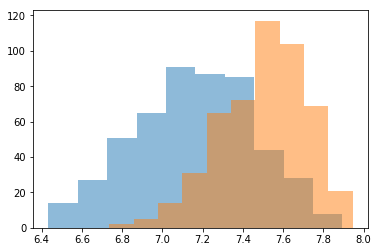

In [27]:
plt.close()
plt.hist(results[:500], alpha=0.5)
plt.hist(results[500:], alpha=0.5)